<IPython.core.display.Javascript object>


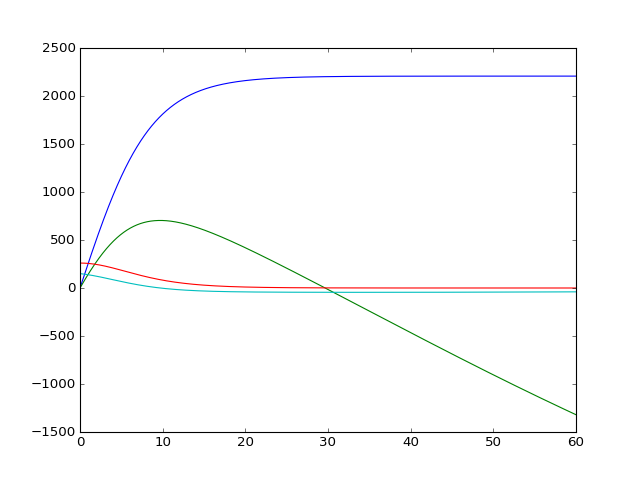

In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

v_0 = 300
c_d = 0.2
r = 0.05

c = -np.pi/2 * c_d * r**2


def find_v(v_x,v_y):
    return np.sqrt(v_x**2 + v_y**2)

def ode_euler(v_0, theta, m, tfinal, h=0.1):
    A = np.array([0,0,v_0*np.cos(theta),v_0*np.sin(theta)])
    t = 0
    v = 300
    thist = [0]
    Ahist = [A]
    while t < tfinal:
#         print("t = %f" % (t,))
        h = min(h, tfinal-t)
        A[2] += h * (c*v*A[2]/m)
        A[3] += h * (c*v*A[3]/m - 9.8)
        v = find_v(A[0], A[1])
        A[0] += h * A[2]
        A[1] += h * A[3]
        
        t += h
        thist.append(t)
        Ahist.append(A.copy())
        #if((A[0] > 2978 and (A[0] > 3000 or A[1] < 980)) or A[1] < 0):
        if((A[0] > 2978 and (A[0] > 3000 or A[1] < 980))):
            break
    return thist, Ahist

def givens_rot(X,theta):
    m,n = X.shape
    G_theta = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    R = np.diag(x)
    for i in range(n-1):
        x = R[i:,i]
        v = x[1:,0]
        U = np.eye(m-i,2)
        U[1:,1] = v.ravel()/np.linalg.norm(v)
        theta = np.arctan2(np.linalg.norm(v),x[0])
        G = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
        R[i:,i:] = (np.eye(m-i,m-i) + U*(G-np.eye(2,2))*U.T)*R[i:,i:]
    return R

def givens_rot2(X, theta):
    G_theta = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    R = np.diag(X)
    return R.dot(G_theta)

def givens_rot3(X,theta):
    G_theta = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    return np.asmatrix(X).dot(G_theta)

# thist, Ahist = ode_euler(v_0, 37*np.pi/180, 8, 60, 0.001)
# plt.plot(thist, Ahist)
# plt.show()
crosspts = []
# for i in reversed(range(30,50)):
#     thist, Ahist = ode_euler(v_0, i*np.pi/180, 8, 60, 0.001)
#     plt.plot(thist, Ahist)
#     R = [givens_rot2(X[:2], 40*np.pi/180) for X in Ahist]
#     for x,y in R:
#         if (np.sign(x[0,1]) != np.sign(y[0,1])):
#             crosspts.append((i,((y[0,0]+x[0,0])/2,(y[0,1]+x[0,1])/2)))
#             break
        
# print(crosspts)
    
thist, Ahist = ode_euler(v_0, 30*np.pi/180, 8, 60, 0.001)
plt.plot(thist, Ahist)
R = [givens_rot3(X[:2], -40*np.pi/180) for X in Ahist]
for j in range(0,len(R)-1):
    x = R[j]
    y = R[j+1]
    if (np.sign(x[0,1]) != np.sign(y[0,1])):
        X = givens_rot3((y+x)/2, 40*np.pi/180)
        crosspts.append((30,(X[0],X[1])))
        break
#     print(x)

for x in crosspts:
    print(x)
